In [8]:
cd /orange/adamginsburg/jwst/brick/F212N/pipeline/

/orange/adamginsburg/jwst/brick/mastDownload/JWST/F212N/pipeline


In [9]:
from photutils import CircularAperture, EPSFBuilder, find_peaks, CircularAnnulus
from photutils.detection import DAOStarFinder, IRAFStarFinder
from photutils.psf import DAOGroup, IntegratedGaussianPRF, extract_stars, IterativelySubtractedPSFPhotometry, BasicPSFPhotometry

In [10]:
from photutils.background import MMMBackground, MADStdBackgroundRMS
from astropy.modeling.fitting import LevMarLSQFitter

In [11]:
from astropy import stats
from astropy.table import Table
from astropy.wcs import WCS

In [12]:
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy.visualization import simple_norm
from astropy import wcs
from astropy import table
from astropy import units as u
import pylab as pl
pl.rcParams['figure.facecolor'] = 'w'
pl.rcParams['image.origin'] = 'lower'

In [13]:
ls *ecsv

jw02221-o001_t001_nircam_clear-f212n-merged_cat.ecsv
jw02221-o001_t001_nircam_clear-f212n-nrca1_cat.ecsv
jw02221-o001_t001_nircam_clear-f212n-nrca2_cat.ecsv
jw02221-o001_t001_nircam_clear-f212n-nrca3_cat.ecsv
jw02221-o001_t001_nircam_clear-f212n-nrca4_cat.ecsv
jw02221-o001_t001_nircam_clear-f212n-nrca_cat.ecsv
jw02221-o001_t001_nircam_clear-f212n-nrcb1_cat.ecsv
jw02221-o001_t001_nircam_clear-f212n-nrcb2_cat.ecsv
jw02221-o001_t001_nircam_clear-f212n-nrcb3_cat.ecsv
jw02221-o001_t001_nircam_clear-f212n-nrcb4_cat.ecsv
jw02221-o001_t001_nircam_clear-f212n-nrcb_cat.ecsv


In [14]:
phot_tables = {(module,number): Table.read(f'jw02221-o001_t001_nircam_clear-f212n-nrc{module}{number}_cat.ecsv')
               for module in 'ab' for number in range(1,5)}

In [15]:
%matplotlib widget

/scratch/local/45915091/ipykernel_25551/1937595960.py:6: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(tbl['sky_centroid'].ra, tbl['sky_centroid'].dec, label=f'{module}{number}',
/scratch/local/45915091/ipykernel_25551/1937595960.py:6: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(tbl['sky_centroid'].ra, tbl['sky_centroid'].dec, label=f'{module}{number}',
/scratch/local/45915091/ipykernel_25551/1937595960.py:6: UserWarning: You passed a edgecolor/edgecolors ('r') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(tbl['sky_centroid'].ra, tbl['sky_centroid'].dec, label=f'{module}{numbe

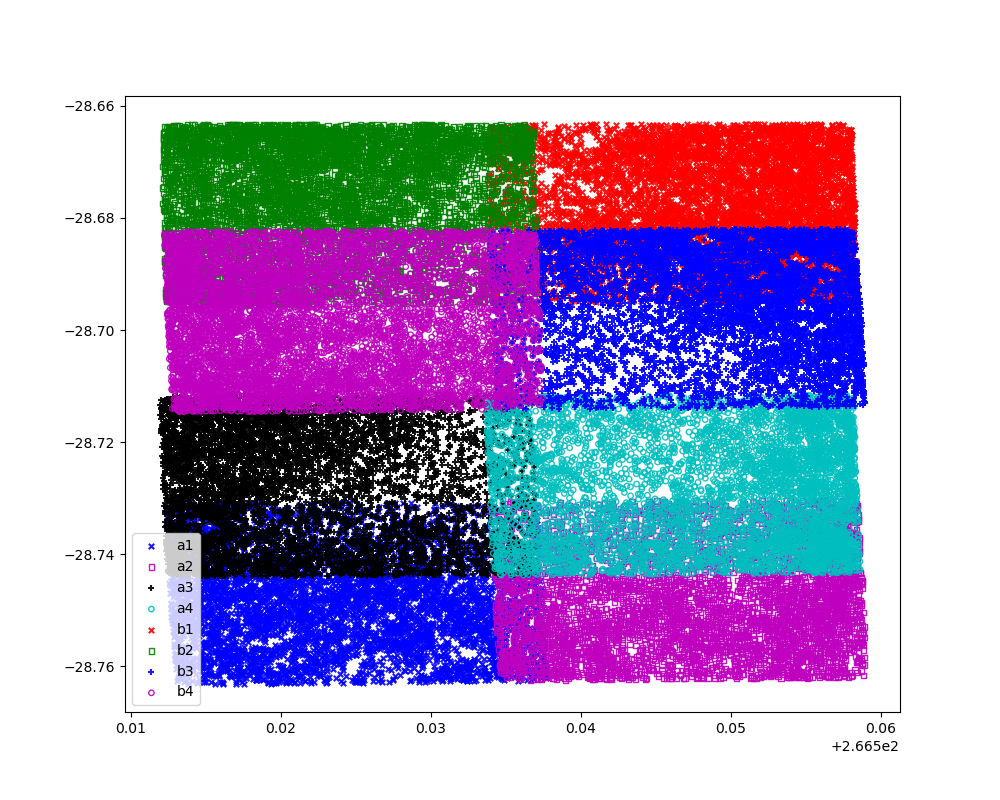

In [16]:
pl.figure(figsize=(10,8))
ax = pl.gca()
for module in 'ab':
    for number in range(1,5):
        tbl = phot_tables[(module, number)]
        ax.scatter(tbl['sky_centroid'].ra, tbl['sky_centroid'].dec, label=f'{module}{number}',
                   s=15, facecolor='none' if number % 2 ==0 else '_rgbmkc'[number + 2*(module=='a')],
                   edgecolor='_rgbmkc'[number + 2*(module=='a')], alpha=0.9, marker='_xs+o'[number])
pl.legend(loc='best')